In [1]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import panel as pn
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
pn.extension()

## Formulation of the inference problem

When we have two random variables $X$ and $Y$ that are coupled in some way, we often hope to infer the value of one variable (e.g. $X$) given a value of the other $Y$.

$$X \rightarrow Y$$

If we observe $Y$, what is our ‘best guess’ for $X$?

For example: $X$ is the number of molecules in a cell and $Y$ is a noisy measurement.

Bayes theorem gives us a framework for addressing the problem.

First, Bayes Theorem says that:

$$P(X \mid Y)P(Y) = P(Y \mid X)P(X)$$

The first thing to realize is that we are interested in $P(X \mid Y)$ the conditional probability of $X$ given an observation of $Y$ . In inference problems, $P(X \mid Y)$ is known as the posterior probability.

Now, we can solve for $P(X \mid Y)$ as

$$P(X \mid Y)= \frac{P(Y \mid X)P(X)}{P(Y)}$$

- $P(X)$ is known as the prior distribution of $X$. 
- $P(Y \mid X)$ is the likelihood. 
- $P(Y)$ is called the evidence. 
- $P(X \mid Y)$ is called the posterior probability.


The core idea in Bayesian inference procedures is to find the value of $X$ that maximizes $P(X|Y)$, the posterior probability, given an observation of $Y$.

$$\underset{X}{\text{argmax}} P(X \mid Y)$$

In practice we often maximize $\log f(x)$ because the log function allows us to convert products into sums.

$$\begin{eqnarray}
\log P(X \mid Y) &=& \log\frac{P(Y \mid X)P(X)}{P(Y)}\\
&=& \log P(Y \mid X) + \log P(X) - \log P(Y)
\end{eqnarray}$$

Now, we can solve formulate our optimization problem:


$$\underset{X}{\text{argmax}} [\log P(X \mid Y)] = \underset{X}{\text{argmax}} [\log P(Y \mid X) + \log P(X) - \log P(Y)]$$



## Inferring light levels from spike counts:

Imagine an organism with a photoreceptor that can ‘count’ the number of photons detected in a given time interval. However, the counting is noisy so that, given $x$, photons incident on the receptor, the probability that the output neuron spikes $y$ times is a Poisson distribution: 

$$P(y\mid x) = \frac{e^{-p_{c} x} (p_{c}x)^y}{y!}$$

Notice that $\lambda = p_{c}x$ where $p_{c}$ is our receptor spiking probability. The equation gives us a probabilistic model for $y$ given $x$.

Remember, we want to infer the environmental light levels from spike counts. That is maximizing $P(X \mid Y)$. 

We start by considering our expression for $\log P(X \mid Y)$.
 
$$\log P(X \mid Y) = \log P(Y \mid X) + \log P(X) - \log P(Y) $$

Let's consider a uniform prior first, that is $P(X) = \frac{1}{n}$:

We have $P(Y \mid X)$ and $P(X)$ now lets consider $P(Y)$.

$$P(Y) = \sum_{x}P(X,Y)$$

It is important to notice that since we are summing over all $x$, the marginal $P(Y)$ does not depend on $X$ anymore.

Now, we have:


$$\begin{eqnarray}
\log P(X \mid Y) &=& \log \frac{e^{-p_{c} x} (p_{c}x)^y}{y!} + \log \frac{1}{n} - \log P(Y)\\
&=& -p_{c}x + y\log p_{c}x - \log y! + \log \frac{1}{n} - \log P(Y)
\end{eqnarray}$$

## Maximum Likelihood Estimation Uniform Prior

Since our uniform prior and our evidence do not depend on $X$., we will discard them. Remember, anything that is not dependent on $X$ will not affect the optimization step.

We want then to optimize the remaining terms, namely our log-likelihood:

$L(x;y) = \log P(y \mid x) =  -p_{c}x + y\log p_{c}x - \log y!$

Remember, if $L$ is a concave function finding its critical point is the same as finding its maximum value.

$\frac{d}{dx}[L(x;y)] = -p_{c} + \frac{y}{x} = 0$

$x = \frac{y}{p_{c}}$


In the case $p_{c} = .2$ and $y = 8$, we have:


$$\begin{eqnarray}
x &=& \frac{8}{.2}\\
 &=& 40
\end{eqnarray}$$

We can see this graphically by plotting the likelihood function.

First let's code a generic Poisson distribution that we can reuse:

$$\text{Poi}(k;\lambda) = \frac{e^{-\lambda}\lambda^k}{k!}$$


In [2]:
def poisson(k, lambda_):
  return ((np.exp(-lambda_))*(lambda_**k))/(factorial(k))

Now our likelihood takes the following form:

$$P(y\mid x) = \frac{e^{-p_{c} x} (p_{c}x)^y}{y!}$$

In [3]:
def Likelihood(x = 40, y = 8, p_c = 0.2):
  lambda_ = p_c*x
  return poisson(y, lambda_)

With $p_{c} = .2$ and $y = 8$, let's plot the likelihood function for some values of $X$.

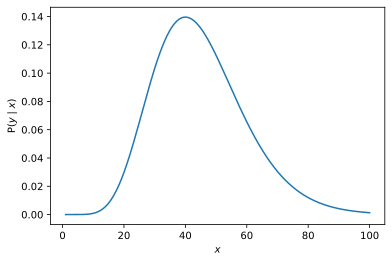

In [4]:
x = np.linspace(1,100, num = 500)
plt.plot(x, Likelihood(x = x, y = 8, p_c = 0.2))
plt.xlabel('$x$')
plt.ylabel('P($y \mid x$)');

We can ask the question given our observations $Y = 8$ what is the value of $X$ that maximizes the likelihood function if $p_c = 0.2$.

In [5]:
x[np.argmax(Likelihood(x = x, y = 8, p_c = 0.2))].round()

40.0

We can also code an interactive version of the previous plot to visualize how the likelihood function changes as we vary our observations $Y$ and $p_c$.

Column
    [0] Column
        [0] IntSlider(end=100, name='y', value=10)
        [1] FloatSlider(name='p_c', value=0.2)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
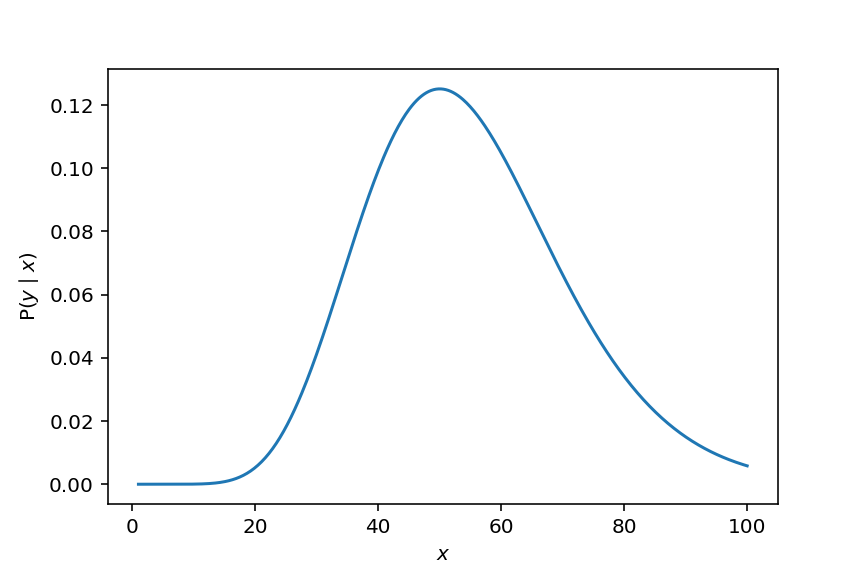

In [6]:
def interactive_plot(y=10 , p_c= 0.2):
  x = np.linspace(1,100, num = 500)
  fig = plt.figure()
  plt.plot(x, Likelihood(x = x, y = y, p_c = p_c))
  plt.xlabel('$x$')
  plt.ylabel('P($y \mid x$)');
  plt.close()
  return fig

pn.interact(interactive_plot, y = (0,100), p_c = (0, 1))

## Full Bayesian solution

Now, imagine that the organisms lives in an environment that has a day-night cycle, so that the marginal or prior probability $P(X)$ has the form of a mixture model:

$P(X) = \frac{1}{2}\text{Poi}(x ; \mu_{\text{day}}) + \frac{1}{2}\text{Poi}(x ; \mu_{\text{night}})$

with $\mu_{\text{day}}$ = 10 and $\mu_{\text{night}}$ = .1.


Now lets include this prior and perform full maximization of the posterior probability.


Again, we have:

$$\log P(X \mid Y) = \log P(Y \mid X) + \log P(X) - \log P(Y) $$

but now we have a form for $P(X)$ that is the Poisson mixture.


$$\begin{eqnarray}
\log P(X \mid Y) &=& \log \left(\frac{e^{-p_{c} x} (p_{c}x)^y}{y!} \right) + \log \left(\frac{1}{2}\text{Poi}(x ; \mu_{\text{day}}) + \frac{1}{2}\text{Poi}(x ; \mu_{\text{night}})\right) - \log (P(Y))\\
&=& \log \left(\frac{e^{-p_{c} x} (p_{c}x)^y}{y!} \right) + \log \left(\frac{1}{2}\left(\frac{e^{-\mu_{\text{day}}} \mu_{\text{day}}^x}{x!} \right) + \frac{1}{2}\left(\frac{e^{-\mu_{\text{night}}} \mu_{\text{night}}^x}{x!} \right)\right) - \log (P(Y)) 
\end{eqnarray}$$

Now since we changed our prior $P(X)$ to a mixture of Poisson distributions (which depends on $X$), when we maximize our posterior $P(X \mid Y)$, we will need to consider also P(X). Our evidence $P(Y)$ still does not depend on X, so we discard it.

Let's code our prior:

In [7]:
def prior(x, u_day = 10, u_night = 0.1):
  return (1/2)*poisson(x, u_day) + (1/2)*poisson(x, u_night)

We can plot our prior distribution: (Notice the position of the peaks.)

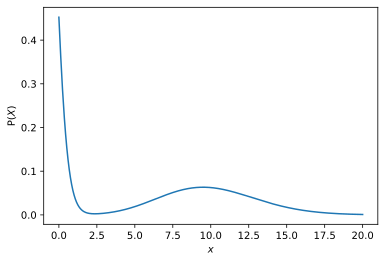

In [8]:
x = np.linspace(0,20, num = 500)
plt.plot(x, prior(x))
plt.xlabel('$x$')
plt.ylabel('P($X$)');

To give you more intuition, We will plot the posterior probability (unnormalized) of $x$ given a measurement of $y = 8$ and $p_c = .2$ just as before. Notice how the prior has dramatically shifted the curve, changing our estimate of $x$.

In [9]:
# This posterior is unnormalized since we are not dividing by P(Y). For the purpose of maximizing P(X|Y), it does not matter since P(Y) is just a scaling factor.
def posterior(x):
  return Likelihood(x = x, y = 8, p_c = 0.2) * prior(x, u_day = 10, u_night = 0.1)

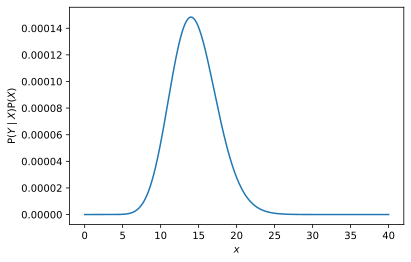

In [10]:
x = np.linspace(0, 40, num = 500)
plt.plot(x, posterior(x))
plt.xlabel('$x$')
plt.ylabel('P($Y \mid X$)P($X$)');

In [11]:
x[np.argmax(posterior(x))].round()

14.0